# Data-Analysis

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from scipy import stats
formato ='{:,.2f}'.format
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',62)
import seaborn as sns
sns.set_style("darkgrid")



In [121]:
import math
#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler




In [122]:
!pip install chart_studio
import chart_studio


In [123]:
#!pip install plotly
import plotly.graph_objs  as  go
import chart_studio.dashboard_objs as dashboard
import chart_studio.plotly.plotly
import chart_studio.plotly as py  #Because plotly is deprecated
import plotly.express as px

import IPython.display
from IPython.display import Image




In [124]:
!pip install dash
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

## Load of data

In [125]:
'''from google.colab import drive
drive.mount('/')
https://drive.google.com/file/d/1LO5o4xgW0PtaJ8JfHdtGIPpvp7V3dI0D/view?usp=drive_link'''

"from google.colab import drive\ndrive.mount('/')\nhttps://drive.google.com/file/d/1LO5o4xgW0PtaJ8JfHdtGIPpvp7V3dI0D/view?usp=drive_link"

In [126]:
file_id = "1z24nxUl39L7-zw8imcsfgIz0EdoYOmF1"

In [127]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [128]:
id = "1z24nxUl39L7-zw8imcsfgIz0EdoYOmF1"

print (id) # Verify that you have everything after '='

1z24nxUl39L7-zw8imcsfgIz0EdoYOmF1


In [129]:
#bd = pd.read_csv("full-data2.csv",index_col=0,low_memory=False,delimiter= ";")
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('full-data3.csv')
bd = pd.read_csv('full-data3.csv',sep=";")
# Dataset is now stored in a Pandas Dataframe

<ipython-input-129-b46d80944071>:4: DtypeWarning:

Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.



In [130]:
df=bd
df.shape

(274602, 51)

First import the master databases with the translations

In [131]:
from google.colab import files
uploaded = files.upload()

Saving Maestras_traduccion_variables.xlsx to Maestras_traduccion_variables (2).xlsx


In [132]:

t_Month=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                     ,sheet_name='Mes')
t_Month['Mes']=t_Month['Mes'].str.upper()
df['Mes']=df['Mes'].str.upper()
df=pd.merge(df, t_Month,how='left', on='Mes')
df=df.drop(['Mes'],axis='columns')



In [133]:
t_Gender=pd.read_excel('Maestras_traduccion_variables.xlsx',
                       dtype=str,
                       sheet_name='Genero')
t_Gender['Genero']=t_Gender['Genero'].str.upper()
df['Genero']=df['Genero'].str.upper()
df=pd.merge(df, t_Gender,how='left', on='Genero')
df=df.drop(['Genero'],axis='columns')


In [134]:

t_Age_Group=pd.read_excel('Maestras_traduccion_variables.xlsx',
                    dtype=str,
                    sheet_name='GRUPO EDAD')
t_Age_Group['GRUPO']=t_Age_Group['GRUPO'].str.upper()
df['GRUPO']=df['GRUPO'].str.upper()
df=pd.merge(df, t_Age_Group,how='left', on='GRUPO')
df=df.drop(['GRUPO'],axis='columns')



In [135]:

t_Regime=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                    ,sheet_name='REGIMEN')
t_Regime['Regimen']=t_Regime['Regimen'].str.upper()
df['Regimen']=df['Regimen'].str.upper()
df=pd.merge(df, t_Regime, how='left',on='Regimen')
df=df.drop(['Regimen'],axis='columns')



In [136]:

t_Doctor_Name=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                    ,sheet_name='DOCTOR_NAME')
t_Doctor_Name['Nombre Profesional']=t_Doctor_Name['Nombre Profesional'].str.upper()
df['Nombre Profesional']=df['Nombre Profesional'].str.upper()
df=pd.merge(df, t_Doctor_Name, how='left',on='Nombre Profesional')
df=df.drop(['Nombre Profesional'],axis='columns')



In [137]:
t_Specialties=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                    ,sheet_name='Especialidad')
t_Specialties['Especialidad']=t_Specialties['Especialidad'].str.upper()
df['Especialidad']=df['Especialidad'].str.upper()
df=pd.merge(df, t_Specialties,how='left', on='Especialidad')
df=df.drop(['Especialidad'],axis='columns')



In [138]:
t_Type_of_Consultation=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                    ,sheet_name='Tipo Consulta')
t_Type_of_Consultation['Tipo Consulta']=t_Type_of_Consultation['Tipo Consulta'].str.upper()
df['Tipo Consulta']=df['Tipo Consulta'].str.upper()
df=pd.merge(df, t_Type_of_Consultation,how='left', on='Tipo Consulta')
df=df.drop(['Tipo Consulta'],axis='columns')



In [139]:
t_Type_SVC=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                    ,sheet_name='Tipo SVC')
t_Type_SVC['Tipo SVC']=t_Type_SVC['Tipo SVC'].str.upper()
df['Tipo SVC']=df['Tipo SVC'].str.upper()
df=pd.merge(df, t_Type_SVC, how='left',on='Tipo SVC')
df=df.drop(['Tipo SVC'],axis='columns')



In [140]:
t_Specialty_Classification=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                    ,sheet_name='Clasificacion especialidad')
t_Specialty_Classification['Clasificacion especialidad']=t_Specialty_Classification['Clasificacion especialidad'].str.upper()
df['Clasificacion especialidad']=df['Clasificacion especialidad'].str.upper()
df=pd.merge(df, t_Specialty_Classification,how='left', on='Clasificacion especialidad')
df=df.drop(['Clasificacion especialidad'],axis='columns')


In [141]:
t_Population_Group=pd.read_excel('Maestras_traduccion_variables.xlsx'
                    ,dtype=str
                    ,sheet_name='GrupoPoblacional')
t_Population_Group['GrupoPoblacional']=t_Population_Group['GrupoPoblacional'].str.upper()
df['GrupoPoblacional']=df['GrupoPoblacional'].str.upper()
df=pd.merge(df, t_Population_Group,how='left', on='GrupoPoblacional')
df=df.drop(['GrupoPoblacional'],axis='columns')

Change the variable name

In [142]:
df.rename(columns={'Sede':'Headquarters','Año':'Year','Mes':'Month','Atención':'Care_Number','Ingreso':'Ingress_Number','TipoIdentificacion':'Type identification','Identificación':'Identification','Nombre':'Name','Genero':'Gender','Edad':'Age','GRUPO':'Age_Group','F. Cita':'Appointment_Date','Hora':'Appointment_time','F. Asignación':'Assignment_Date','FechaDeseada':'Desired_Date','Modalidad':'Modality','Regimen':'Regime','CausaCancelacion':'Cancellation_Causes','COD ERP':'COD_ERP','ERP VALIDADA':'ERP','ERP':'ERP2','Cod. Servicio':'Service_Code','Nom. Servicio':'Service_Name','Cod. Dx':'Code_Dx','Dx Principal':'Principal_Dx','Cod. DxRel1':'Code_Related_Dx1','Dx Relacionado1':'Related_Dx1','Cod. DxRel2':'Code_Related_Dx2','DescripcionDxRelacionado2':'Related_Dx2','Cod. DxRel3':'Code_Related_Dx3','Dx Relacionado3':'Related_Dx3','CC. Profesional':'Doctor_ID','Nombre Profesional':'Doctor_Name','Estado':'Original_Status','Estado- 2':'Status','Tipo Cita':'Appointment_type','Tipo Cita R':'Appointment_type_R','Especialidad':'Specialties','Servicio Habilitado':'Service_Enabled','Tipo Consulta':'Type_of_consultation','Tipo Consulta R':'Type_of_consultation_R','Unidad':'Unit','Tipo SVC':'Type_of_Service','Clasificacion especialidad':'Specialty_Classification','FormatosPyP':'PYP','GrupoPoblacional':'Population_Group','PertenenciaEtnica':'Ethnicity','Oportunidad Asignacion':'Wait_time_between_Assignment_Appointment','Oportunidad (sin festivos y fin de semanas) Fecha deseada':'Wait_time_between_DesiredDate_Appointment',
},inplace=True)

It was decided to eliminate the following variables from the database:

-*Private patient information:*
**Type identification**
**Identification**
**Name**

-*Variables captured at the time of the medical appointment, so the No-Show does not have this information:*
**Ingress_Number**
**Code_Dx**
**Principal_Dx**
**Code_Related_Dx1**
**Related_Dx1**
**Code_Related_Dx2**
**Related_Dx2**
**Code_Related_Dx3**
**Related_Dx3**

-*Variables with repeated information, no information ,or inaccurate information: hospital administration*
**Modality**
**Cancellation_Causes**
**COD_ERP**
**ERP2**
**Service_Code**
**Service_Name**
**Doctor_ID**
**Original_Status**
**Appointment_type**
**Appointment_type_R**
**Service_Enabled**
**Type_of_consultation_R**
**Unit**
**PYP**
**Ethnicity**


# Review

In [143]:
df = df.drop(['Type identification' ,'Identification','Name','Ingress_Number','Code_Dx','Principal_Dx','Code_Related_Dx1','Related_Dx1','Code_Related_Dx2','Related_Dx2','Code_Related_Dx3','Related_Dx3','Modality','Cancellation_Causes','COD_ERP','ERP2','Service_Code','Service_Name','Doctor_ID','Original_Status','Appointment_type','Appointment_type_R','Service_Enabled','Type_of_consultation_R','Unit','PYP','Ethnicity'], axis='columns')

df.head()

,Headquarters,Year,Care_Number,Age,Appointment_Date,Appointment_time,Assignment_Date,Desired_Date,ERP,TYPE_ERP,Status,Specialties_group,Wait_time_between_Assignment_Appointment,Wait_time_between_DesiredDate_Appointment,Month,Gender,Age_Group,Regime,Doctor_Name,Specialties,Type_of_consultation,Type_of_Service,Specialty_Classification,Population_Group
0,LEON XIII,2023,6444457,87,1/01/23,0.291667,1/01/23,1/01/23,NUEVA EPS S.A. PGP,PGP,Show,CLINICAL SPECIALTIES,0,0,JANUARY,FEMALE,6. OLD ADULTS FROM 60 YEARS OLD AND OVER,CONTRIBUTORY,DOCTOR435,GP (GENERAL PRACTITIONER/GENERAL MEDICINE),NORMAL,GENERAL MEDICINE,NOT APPLICABLE,GENERAL POPULATION
1,LEON XIII,2023,6444536,73,1/01/23,0.541667,1/01/23,1/01/23,ALIANZA MEDELLIN ANTIOQUIA EPS S.A.S PGP,PGP,Show,CLINICAL SPECIALTIES,0,0,JANUARY,FEMALE,6. OLD ADULTS FROM 60 YEARS OLD AND OVER,SUBSIDIZED,DOCTOR435,GP (GENERAL PRACTITIONER/GENERAL MEDICINE),NORMAL,GENERAL MEDICINE,NOT APPLICABLE,GENERAL POPULATION
2,LEON XIII,2023,6443204,25,2/01/23,0.291667,30/12/22,2/01/23,PRODIAGNOSTICO SA,EVENT,Show,CLINICAL SPECIALTIES,0,1,JANUARY,FEMALE,4. YOUNG ADULTS 18 TO 28 YEARS OLD,NOT APPLICABLE,DOCTOR430,ANESTHESIOLOGY,PRE-SURGICAL,SPECIALIZED MEDICINE,SPECIALIZED,GENERAL POPULATION
3,LEON XIII,2023,6443219,6,2/01/23,0.305556,30/12/22,2/01/23,PRODIAGNOSTICO SA,EVENT,No-Show,CLINICAL SPECIALTIES,0,1,JANUARY,MALE,2. CHILDREN 6 TO 11 YEARS OLD,NOT APPLICABLE,DOCTOR430,ANESTHESIOLOGY,PRE-SURGICAL,SPECIALIZED MEDICINE,SPECIALIZED,GENERAL POPULATION
4,LEON XIII,2023,6443238,8,2/01/23,0.347222,30/12/22,2/01/23,PRODIAGNOSTICO SA,EVENT,Show,CLINICAL SPECIALTIES,0,1,JANUARY,FEMALE,2. CHILDREN 6 TO 11 YEARS OLD,NOT APPLICABLE,DOCTOR430,ANESTHESIOLOGY,PRE-SURGICAL,SPECIALIZED MEDICINE,SPECIALIZED,GENERAL POPULATION


The base initially had 48 variables and after excluding the variables mentioned above, the base is left with 22 variables.

In [ ]:
df["Status"].value_counts()

Show       240389
No-Show     34213
Name: Status, dtype: int64

In [144]:
df.replace({'Status':{"Show":0,"No-Show":1}},inplace=True)

df['Status'].value_counts()

0    240389
1     34213
Name: Status, dtype: int64

**New variable with year+month->quantitative variable**

In [145]:
#Change the variable: Month for number
df['Month_N']=df['Month'].str.lower()
df.replace({'Month_N':{"january":0,"february":1,"march":2,"april":3,"may":4,"june":5,"july":6,"august":7,"september":8,"october":9,"november":10,"december":11}},inplace=True)
df['Month_N']

0         0
1         0
2         0
3         0
4         0
         ..
274597    5
274598    5
274599    5
274600    5
274601    5
Name: Month_N, Length: 274602, dtype: int64

In [146]:
#Chance the variable: Year for number 2 and 3
df['Year_N']=df['Year'].astype(str)
df.replace({'Year_N':{"2022":2,"2023":3}},inplace=True)
df['Year_N']

#Join of Month + Year= Year_N+(Month-1)/12

df['Year+Month']=df['Year_N']+((df['Month_N'])/12)
df['Year+Month']


0         3.000000
1         3.000000
2         3.000000
3         3.000000
4         3.000000
            ...   
274597    2.416667
274598    2.416667
274599    2.416667
274600    2.416667
274601    2.416667
Name: Year+Month, Length: 274602, dtype: float64

As can be seen, there is no NA in the variables

In [ ]:
#df = df[['Headquarters','Year+Month','Age','Appointment_time','Status','Wait_time_between_Assignment_Appointment','Wait_time_between_DesiredDate_Appointment','Gender','Regime','Type_of_consultation','Type_of_Service','Specialty_Classification','Population_Group','TYPE_ERP','Specialties_group']]
#df.head()

## Preprocessing

In [147]:
df["Status"].value_counts()

0    240389
1     34213
Name: Status, dtype: int64

N/A

In [148]:
df.isnull().sum()

Headquarters                                 0
Year                                         0
Care_Number                                  0
Age                                          0
Appointment_Date                             0
Appointment_time                             0
Assignment_Date                              0
Desired_Date                                 0
ERP                                          0
TYPE_ERP                                     0
Status                                       0
Specialties_group                            0
Wait_time_between_Assignment_Appointment     0
Wait_time_between_DesiredDate_Appointment    0
Month                                        0
Gender                                       0
Age_Group                                    0
Regime                                       0
Doctor_Name                                  0
Specialties                                  0
Type_of_consultation                         0
Type_of_Servi

In [149]:
to_drop  = df.columns[df.isnull().sum()/df.shape[0]>.7]
to_drop

Index([], dtype='object')

In [151]:
df.drop(to_drop, axis=1, inplace=True)

In [152]:
df.shape

(274602, 27)

As can be seen, there is no NA in the variables

## Analysis

In [153]:
df.dtypes

Headquarters                                  object
Year                                           int64
Care_Number                                    int64
Age                                            int64
Appointment_Date                              object
Appointment_time                             float64
Assignment_Date                               object
Desired_Date                                  object
ERP                                           object
TYPE_ERP                                      object
Status                                         int64
Specialties_group                             object
Wait_time_between_Assignment_Appointment       int64
Wait_time_between_DesiredDate_Appointment      int64
Month                                         object
Gender                                        object
Age_Group                                     object
Regime                                        object
Doctor_Name                                   

In [154]:
df.describe(include="all")

,Headquarters,Year,Care_Number,Age,Appointment_Date,Appointment_time,Assignment_Date,Desired_Date,ERP,TYPE_ERP,Status,Specialties_group,Wait_time_between_Assignment_Appointment,Wait_time_between_DesiredDate_Appointment,Month,Gender,Age_Group,Regime,Doctor_Name,Specialties,Type_of_consultation,Type_of_Service,Specialty_Classification,Population_Group,Month_N,Year_N,Year+Month
count,274602,274602.000000,2.746020e+05,274602.000000,274602,274602.000000,274602,274602,274602,274602,274602.000000,274602,274602.000000,274602.000000,274602,274602,274602,274602,274602,274602,274602,274602,274602,274602,274602.000000,274602.000000,274602.000000
unique,3,NaN,NaN,NaN,467,NaN,512,513,82,3,NaN,3,NaN,NaN,12,2,6,4,500,59,4,6,4,6,NaN,NaN,NaN
top,Prado,NaN,NaN,NaN,23/03/23,NaN,8/11/22,27/10/22,NUEVA EPS S.A. PGP,PGP,NaN,CLINICAL SPECIALTIES,NaN,NaN,MARCH,FEMALE,6. OLD ADULTS FROM 60 YEARS OLD AND OVER,CONTRIBUTORY,DOCTOR436,GP (GENERAL PRACTITIONER/GENERAL MEDICINE),NORMAL,SPECIALIZED MEDICINE,NOT APPLICABLE,GENERAL POPULATION,NaN,NaN,NaN
freq,156598,NaN,NaN,NaN,1186,NaN,1261,1748,81601,132995,NaN,229322,NaN,NaN,39302,169610,163009,125216,10703,89770,240117,130668,143934,271955,NaN,NaN,NaN
mean,NaN,2022.291076,6.280614e+06,58.295890,NaN,0.500810,NaN,NaN,NaN,NaN,0.124591,NaN,5.909247,5.938194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.640392,2.291076,2.677775
std,NaN,0.454259,1.999591e+05,21.798826,NaN,0.132646,NaN,NaN,NaN,NaN,0.330255,NaN,5.738964,5.733045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.565220,0.454259,0.376538
min,NaN,2022.000000,4.988335e+06,0.000000,NaN,0.104167,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000,2.000000
25%,NaN,2022.000000,6.099714e+06,47.000000,NaN,0.388889,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.333333
50%,NaN,2022.000000,6.291020e+06,64.000000,NaN,0.479167,NaN,NaN,NaN,NaN,0.000000,NaN,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,2.000000,2.666667
75%,NaN,2023.000000,6.456282e+06,74.000000,NaN,0.611111,NaN,NaN,NaN,NaN,0.000000,NaN,9.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,3.000000,3.000000


In [155]:
df['Appointment_Date']

0          1/01/23
1          1/01/23
2          2/01/23
3          2/01/23
4          2/01/23
            ...   
274597    22/06/22
274598    30/06/22
274599    17/06/22
274600    24/06/22
274601    30/06/22
Name: Appointment_Date, Length: 274602, dtype: object

In [157]:
df.replace({'Status':{"Show":0,"No-Show":1}},inplace=True)

df['Status'].value_counts()

0    240389
1     34213
Name: Status, dtype: int64

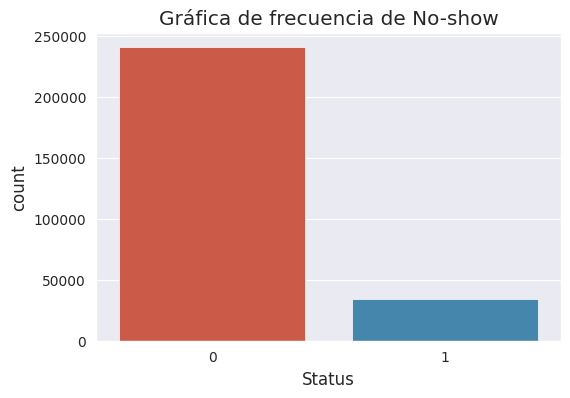

In [158]:
plt.figure(figsize=(6,4))

plt.title('Gráfica de frecuencia de No-show')
sns.countplot(x=df['Status'])

plt.show()

## Variable analysis

**Year**

In [159]:
df['Year']=df['Year'].astype(str)
df['Year']=df["Year"].str.lower()
df.groupby('Year')['Status'].mean().sort_values(ascending=False)

Year
2022    0.125940
2023    0.121306
Name: Status, dtype: float64

**Month**

In [160]:
df['Month']=df["Month"].str.lower()
df.groupby('Month')['Status'].mean().sort_values(ascending=False)

Month
june         0.147901
july         0.145924
may          0.135094
september    0.132873
november     0.131771
april        0.127295
march        0.123403
october      0.119757
august       0.117754
december     0.116273
february     0.114164
january      0.110279
Name: Status, dtype: float64

A very similar proportionality is shown from one month to the next. However, the months with the highest proportionality are the vacation months (June and July).
                                    

**New variable with year+month->quantitative variable**

In [161]:
#Change the variable: Month for number
df['Month_N']=df['Month']
df.replace({'Month_N':{"january":0,"february":1,"march":2,"april":3,"may":4,"june":5,"july":6,"august":7,"september":8,"october":9,"november":10,"december":11}},inplace=True)
df['Month_N']

#Chance the variable: Year for number 2 and 3
df['Year_N']=df['Year']
df.replace({'Year_N':{"2022":2,"2023":3}},inplace=True)
df['Year_N']

#Join of Month + Year= Year_N+(Month-1)/12

df['Year+Month']=df['Year_N']+((df['Month_N'])/12)
df['Year+Month']


0         3.000000
1         3.000000
2         3.000000
3         3.000000
4         3.000000
            ...   
274597    2.416667
274598    2.416667
274599    2.416667
274600    2.416667
274601    2.416667
Name: Year+Month, Length: 274602, dtype: float64

In [ ]:
#df['Month_N'].astype(str)
#df.groupby('Month_N')['Status'].mean().sort_values(ascending=False)

**Appointment_time**

In [162]:
df['Appointment_time'].astype(str)

0         0.291666667
1         0.541666667
2         0.291666667
3         0.305555556
4         0.347222222
             ...     
274597    0.569444444
274598    0.291666667
274599    0.541666667
274600    0.541666667
274601    0.555555556
Name: Appointment_time, Length: 274602, dtype: object

In [163]:
df['session'] = np.where(df['Appointment_time']>=0.5, 'Afternoon Session',None)
df['session'] = np.where(df['Appointment_time']<0.5, 'Morning Session',df['session'])

df['session']=df["session"].str.lower()
df.groupby('session')['Status'].mean().sort_values(ascending=False)

session
morning session      0.135128
afternoon session    0.112835
Name: Status, dtype: float64

It is not very significant whether the appointment is in the morning or in the afternoon.

**Specialty**

In [164]:
df['Specialties']=df["Specialties"].str.lower()
df.groupby('Specialties')['Status'].mean().sort_values(ascending=False)

Specialties
sports medicine                                   0.626836
occupational medicine                             0.274617
nutrition and dietetics                           0.234838
pediatric infectiology                            0.225806
psychology                                        0.219295
pediatrics                                        0.196099
toxicology                                        0.166471
optometry                                         0.160022
infectiology (infectious disease)                 0.154867
pharmacology                                      0.142084
geriatrics                                        0.139344
psychiatry                                        0.128289
cardiovascular surgery (cardiac surgery)          0.120000
nursing                                           0.116897
electrophysiology                                 0.115385
peripheral vascular diseases-anticoagulants       0.114155
otolaryngology                              

In [165]:
df.loc[df['Specialties'] != 'sports medicine', 'Specialties'] = 'Other Specialties'

In [166]:
df['Specialties']=df["Specialties"].str.lower()
df.groupby('Specialties')['Status'].mean().sort_values(ascending=False)

Specialties
sports medicine      0.626836
other specialties    0.114425
Name: Status, dtype: float64

Sports Medicine is the main specialty presented No-Shows. In addition, it can be observed that the top 5 specialties with the highest percentage of non-attendance are those included in the family medicine or support specialties.

**Age and Age Group**

<Axes: xlabel='Status', ylabel='Age'>

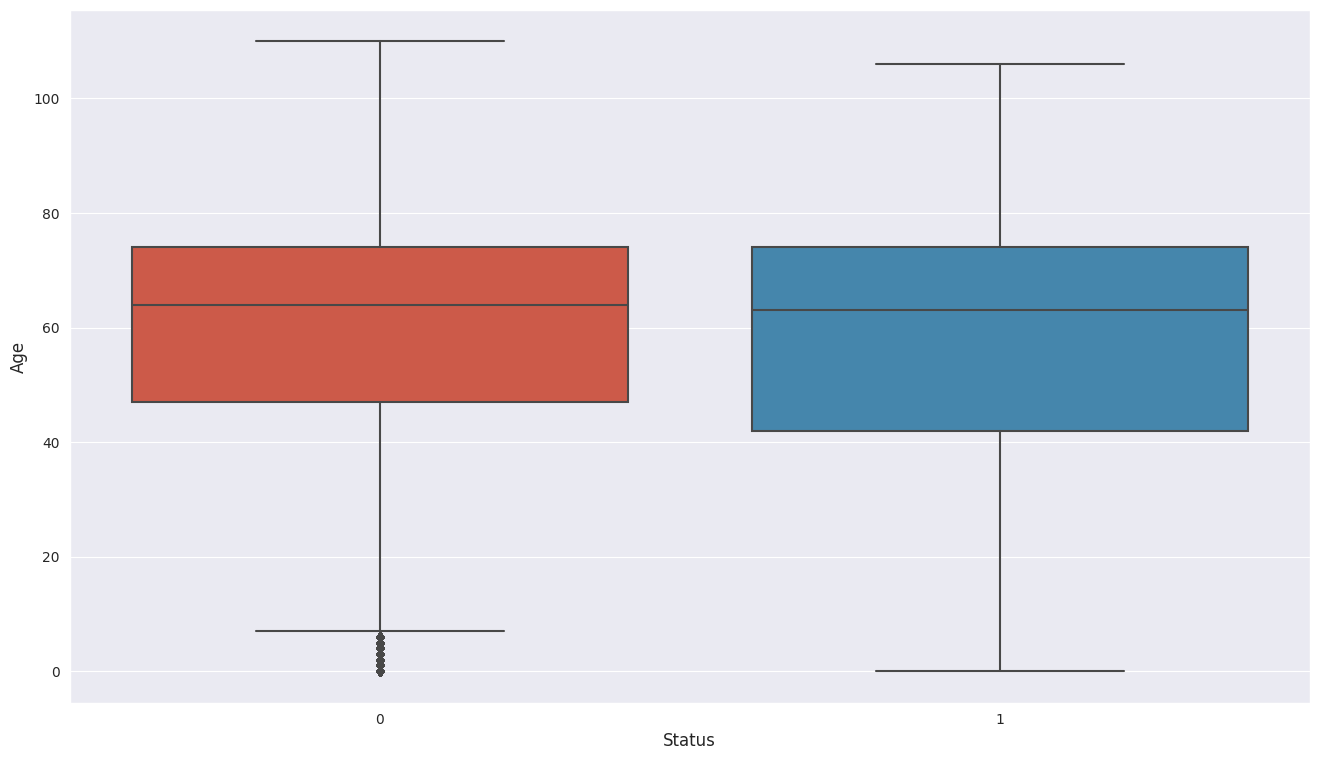

In [167]:
sns.boxplot(data=df,x='Status',y='Age')

The boxplots overlap, so from the graph, it is not very conclusive whether there is an influence of age on whether or not the patient attends the medical appointment.

In [168]:
df['Age_Group']=df["Age_Group"].str.lower()
df.groupby('Age_Group')['Status'].mean().sort_values(ascending=False)

Age_Group
4. young adults 18 to 28 years old           0.178071
5. adults 29 to 59 years old                 0.126316
6. old adults  from 60 years old and over    0.119760
1. early infancy 0 to 5 years old            0.116126
3. adolescents 12 to 17 years old            0.113712
2. children  6 to 11 years old               0.099372
Name: Status, dtype: float64

When age is broken down into groups, it is observed that the *Young adults* group represents a higher probability of non-attendance.

**Wait_time_between_Assignment_Appointment**  

<Axes: xlabel='Status', ylabel='Wait_time_between_Assignment_Appointment'>

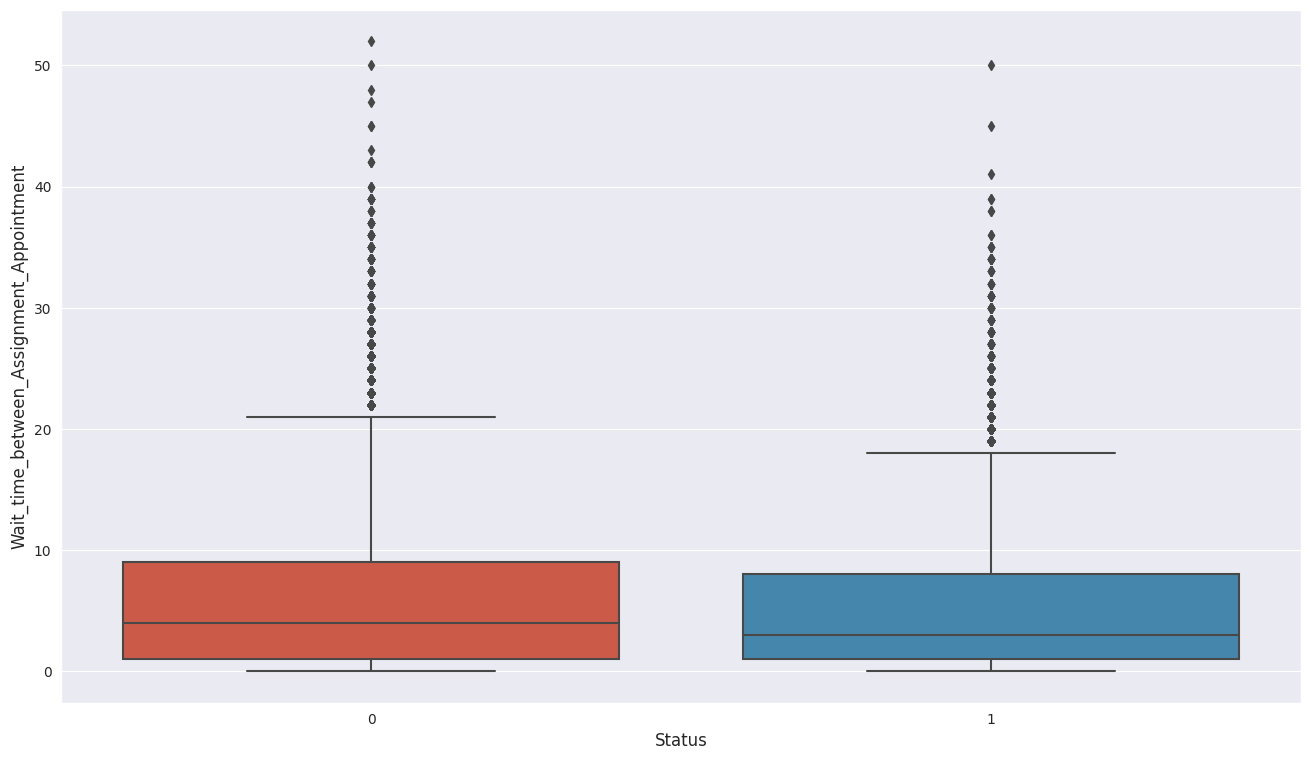

In [169]:
sns.boxplot(data=df,x='Status',y='Wait_time_between_Assignment_Appointment')

The boxplots overlap, so from the graph, it is not very conclusive whether there is an influence of Wait_time_between_Assignment_Appointment  on whether or not the patient attends the medical appointment.

**Wait_time_between_DesiredDate_Appointment**

<Axes: xlabel='Status', ylabel='Wait_time_between_DesiredDate_Appointment'>

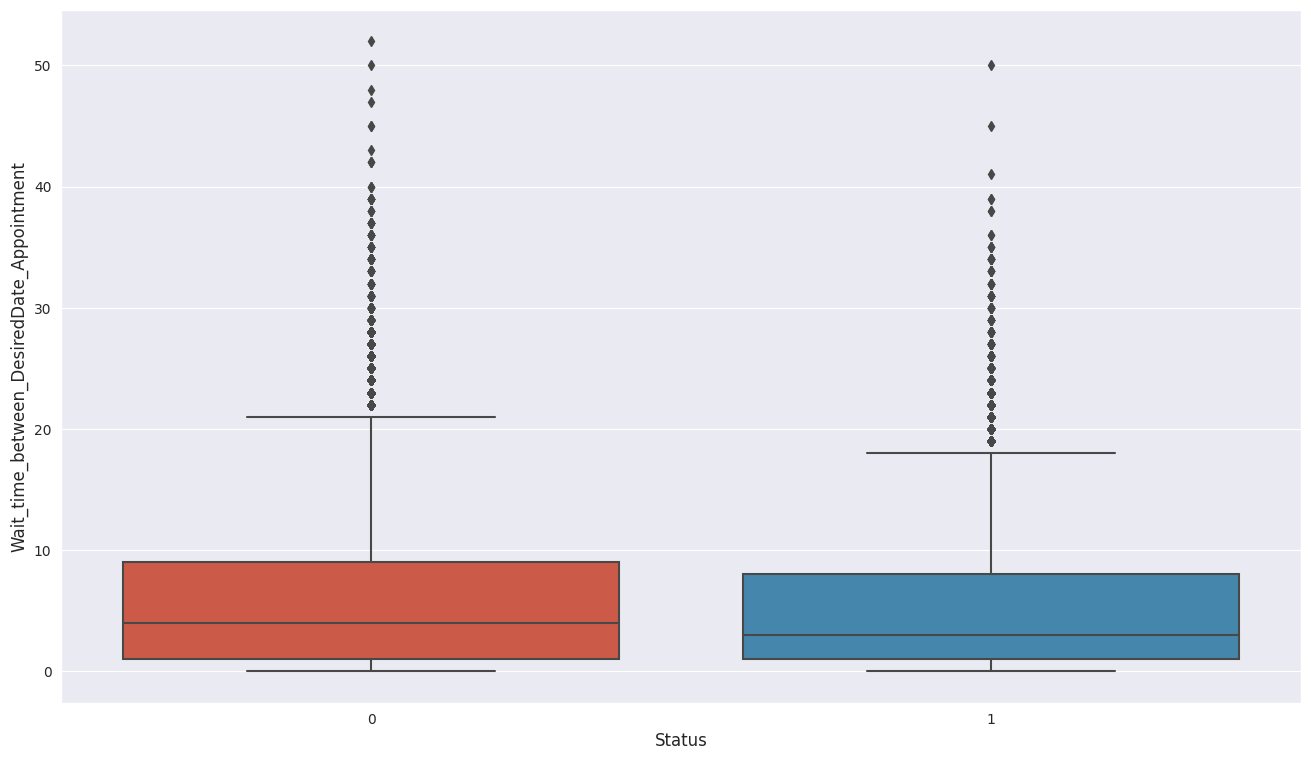

In [170]:
sns.boxplot(data=df,x='Status',y='Wait_time_between_DesiredDate_Appointment')

The boxplots overlap, so from the graph, it is not very conclusive whether there is an influence of Wait_time_between_DesiredDate_Appointment  on whether or not the patient attends the medical appointment.

**Gender**

In [171]:
df['Gender']=df["Gender"].str.lower()
df.groupby('Gender')['Status'].mean().sort_values(ascending=False)
#df.groupby('Gender')['Status'].sum().sort_values(ascending=False)

Gender
female    0.126272
male      0.121876
Name: Status, dtype: float64

There appears to be no difference for the gender variable about the no-show patient

**Regime**                                       

In [172]:
df['Regime']=df["Regime"].str.lower()
df.groupby('Regime')['Status'].mean().sort_values(ascending=False)


Regime
not applicable    0.183396
contributory      0.141428
subsidized        0.101779
special           0.094942
Name: Status, dtype: float64

People affiliated to extra insurance, are the ones that present the highest no show in comparison to the other categories of this same variable

**Doctor_Name**                                   

<Axes: >

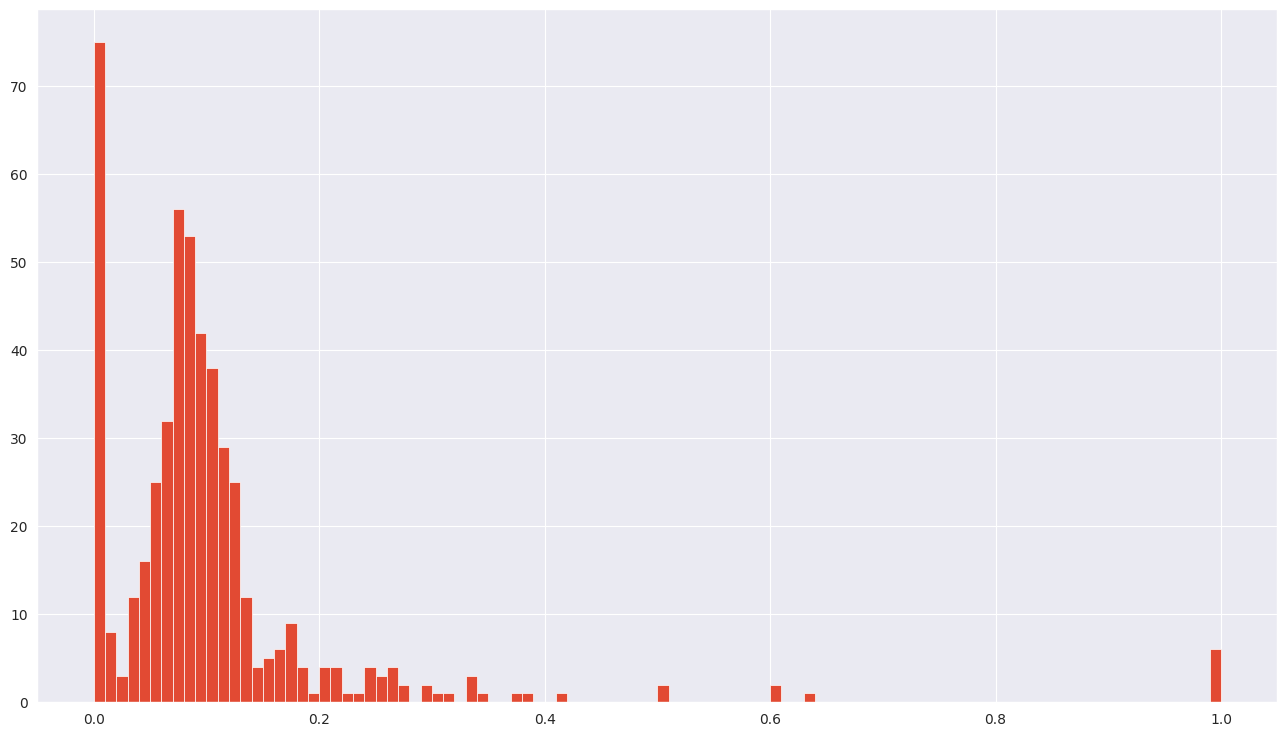

In [173]:
df['Doctor_Name']=df["Doctor_Name"].str.lower()
df.groupby('Doctor_Name')['Status'].mean().sort_values(ascending=False).hist(bins=100)


In [174]:
df.groupby('Doctor_Name')['Status'].mean().sort_values(ascending=False)

Doctor_Name
doctor356    1.0
doctor68     1.0
doctor490    1.0
doctor496    1.0
doctor371    1.0
            ... 
doctor474    0.0
doctor175    0.0
doctor471    0.0
doctor348    0.0
doctor221    0.0
Name: Status, Length: 500, dtype: float64

**Type_of_consultation**

In [175]:
df['Type_of_consultation']=df["Type_of_consultation"].str.lower()
df.groupby('Type_of_consultation')['Status'].mean().sort_values(ascending=False)

Type_of_consultation
normal           0.127738
procedure        0.114483
post-surgical    0.100910
pre-surgical     0.068996
Name: Status, dtype: float64

The highest proportionality of no-show appointments  presented is "normal". But it is not different

**Type_of_Service**  

In [176]:
df['Type_of_Service']=df["Type_of_Service"].str.lower()
df.groupby('Type_of_Service')['Status'].mean().sort_values(ascending=False)


Type_of_Service
pyp (health promotion and prevention)    0.226652
other disciplines                        0.214115
specialized medicine                     0.121858
minor procedures                         0.106913
rcv-chronic patient                      0.096795
general medicine                         0.088060
Name: Status, dtype: float64

The highest proportionality of no-show appointments are "pyp" and "other disciplines".

**Specialty_Classification**

In [178]:
df['Specialty_Classification']=df["Specialty_Classification"].str.lower()
df.groupby('Specialty_Classification')['Status'].mean().sort_values(ascending=False)


Specialty_Classification
specialized       0.147309
not applicable    0.127072
basics            0.098427
subspecialized    0.080915
Name: Status, dtype: float64

**Population_Group**

In [179]:
df['Population_Group']=df["Population_Group"].str.lower()
df.groupby('Population_Group')['Status'].mean().sort_values(ascending=False)

Population_Group
general population             0.125738
street dweller                 0.011407
victims of armed conflict      0.007328
other ethnicities              0.003953
colombian ethnicities          0.000000
reintegrated or demobilized    0.000000
Name: Status, dtype: float64

 It could be said that the most significant proportion of no-shows is of the general population, and that the other population groups always attend their appointments.

## **Second Analysis of variables with graphics**

### *Categorical Variables*

In [180]:
from dash import Dash, dcc, html, Input, Output, Patch, callback
app = Dash(__name__)


app.layout = html.Div([
    html.H4('Count of No-Show'),
    dcc.Dropdown(
        id="dropdown1",
        options=['Gender','Regime','Doctor_Name','Specialties','Type_of_consultation','Type_of_Service','Specialty_Classification','Population_Group','TYPE_ERP','Specialties_group'],
        value="Gender",



    ),
    dcc.Graph(id="graph1"),
])


@app.callback(
    Output("graph1", "figure"),
    Input("dropdown1", "value"))
def update_bar_chart(dims):
    df1 = df
    fig1=px.histogram(data_frame=df1,x=dims,color="Status",barmode="group",text_auto=True)
    return fig1


app.run_server(debug=False, use_reloader=False)

<IPython.core.display.Javascript object>

In [182]:

app2 = Dash(__name__)


app2.layout = html.Div([
    html.H4('Count of No-Show'),
    dcc.Dropdown(
        id="dropdown2",
        options=['Gender','Regime','Doctor_Name','Specialties','Type_of_consultation','Type_of_Service','Specialty_Classification','Population_Group','TYPE_ERP','Specialties_group'],
        value="Gender",
        #multi=True,


    ),
    dcc.Graph(id="graph2"),
])


@app2.callback(
    Output("graph2", "figure"),
    Input("dropdown2", "value"))
def update_bar_chart(dims):
    df1 = df
    fig2=px.histogram(data_frame=df1,x=dims,y="Status", histfunc='avg', barmode="group",text_auto=True)
    return fig2


app2.run_server(debug=False, use_reloader=False)





<IPython.core.display.Javascript object>

### *Quantitatives Variables*

In [ ]:
app3 = Dash(__name__)


app3.layout = html.Div([
    html.H4('Distribution of No-Show'),
    dcc.Dropdown(
        id="dropdown3",
        options=['Year+Month','Age','Appointment_time','Wait_time_between_Assignment_Appointment','Wait_time_between_DesiredDate_Appointment'],
        value="Year+Month",



    ),
    dcc.Graph(id="graph3"),
])


@app3.callback(
    Output("graph3", "figure"),
    Input("dropdown3", "value"))
def update_bar_chart(dims):
    df1 = df
    fig3 = px.violin(df1, y=dims,x="Status",color="Status", box=True, points="all",
          hover_data=df1.columns)
    return fig3


app3.run_server(debug=False, use_reloader=False)

<IPython.core.display.Javascript object>

In [ ]:
fig4 = px.violin(df, y="Wait_time_between_Assignment_Appointment", x="Regime", box=True, points="all") #,hover_data=df.columns)
fig4.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fig5 = px.violin(df, y="Wait_time_between_DesiredDate_Appointment", x="Regime", box=True, points="all",hover_data=df.columns)
fig5.show()

In [ ]:
fig5.show()

### ***Histogram by Doctor***

In [ ]:
fig = px.histogram(df, x="Status", color="Doctor_Name")
fig.show()

In [ ]:
app6 = Dash(__name__)


app6.layout = html.Div([
    html.H4('Distribution by Doctor'),
    dcc.Dropdown(
        id="dropdown6",
        options=["DOCTOR1","DOCTOR2","DOCTOR3","DOCTOR4","DOCTOR5","DOCTOR6","DOCTOR7","DOCTOR8","DOCTOR9","DOCTOR10","DOCTOR11","DOCTOR12","DOCTOR13","DOCTOR14","DOCTOR15","DOCTOR16","DOCTOR17","DOCTOR18","DOCTOR19","DOCTOR20","DOCTOR21","DOCTOR22","DOCTOR23","DOCTOR24","DOCTOR25","DOCTOR26","DOCTOR27","DOCTOR28","DOCTOR29","DOCTOR30","DOCTOR31","DOCTOR32","DOCTOR33","DOCTOR34","DOCTOR35","DOCTOR36","DOCTOR37","DOCTOR38","DOCTOR39","DOCTOR40","DOCTOR41","DOCTOR42","DOCTOR43","DOCTOR44","DOCTOR45","DOCTOR46","DOCTOR47","DOCTOR48","DOCTOR49","DOCTOR50","DOCTOR51","DOCTOR52","DOCTOR53","DOCTOR54","DOCTOR55","DOCTOR56","DOCTOR57","DOCTOR58","DOCTOR59","DOCTOR60","DOCTOR61","DOCTOR62","DOCTOR63","DOCTOR64","DOCTOR65","DOCTOR66","DOCTOR67","DOCTOR68","DOCTOR69","DOCTOR70","DOCTOR71","DOCTOR72","DOCTOR73","DOCTOR74","DOCTOR75","DOCTOR76","DOCTOR77","DOCTOR78","DOCTOR79","DOCTOR80","DOCTOR81","DOCTOR82","DOCTOR83","DOCTOR84","DOCTOR85","DOCTOR86","DOCTOR87","DOCTOR88","DOCTOR89","DOCTOR90","DOCTOR91","DOCTOR92","DOCTOR93","DOCTOR94","DOCTOR95","DOCTOR96","DOCTOR97","DOCTOR98","DOCTOR99","DOCTOR100","DOCTOR101","DOCTOR102","DOCTOR103","DOCTOR104","DOCTOR105","DOCTOR106","DOCTOR107","DOCTOR108","DOCTOR109","DOCTOR110","DOCTOR111","DOCTOR112","DOCTOR113","DOCTOR114","DOCTOR115","DOCTOR116","DOCTOR117","DOCTOR118","DOCTOR119","DOCTOR120","DOCTOR121","DOCTOR122","DOCTOR123","DOCTOR124","DOCTOR125","DOCTOR126","DOCTOR127","DOCTOR128","DOCTOR129","DOCTOR130","DOCTOR131","DOCTOR132","DOCTOR133","DOCTOR134","DOCTOR135","DOCTOR136","DOCTOR137","DOCTOR138","DOCTOR139","DOCTOR140","DOCTOR141","DOCTOR142","DOCTOR143","DOCTOR144","DOCTOR145","DOCTOR146","DOCTOR147","DOCTOR148","DOCTOR149","DOCTOR150","DOCTOR151","DOCTOR152","DOCTOR153","DOCTOR154","DOCTOR155","DOCTOR156","DOCTOR157","DOCTOR158","DOCTOR159","DOCTOR160","DOCTOR161","DOCTOR162","DOCTOR163","DOCTOR164","DOCTOR165","DOCTOR166","DOCTOR167","DOCTOR168","DOCTOR169","DOCTOR170","DOCTOR171","DOCTOR172","DOCTOR173","DOCTOR174","DOCTOR175","DOCTOR176","DOCTOR177","DOCTOR178","DOCTOR179","DOCTOR180","DOCTOR181","DOCTOR182","DOCTOR183","DOCTOR184","DOCTOR185","DOCTOR186","DOCTOR187","DOCTOR188","DOCTOR189","DOCTOR190","DOCTOR191","DOCTOR192","DOCTOR193","DOCTOR194","DOCTOR195","DOCTOR196","DOCTOR197","DOCTOR198","DOCTOR199","DOCTOR200","DOCTOR201","DOCTOR202","DOCTOR203","DOCTOR204","DOCTOR205","DOCTOR206","DOCTOR207","DOCTOR208","DOCTOR209","DOCTOR210","DOCTOR211","DOCTOR212","DOCTOR213","DOCTOR214","DOCTOR215","DOCTOR216","DOCTOR217","DOCTOR218","DOCTOR219","DOCTOR220","DOCTOR221","DOCTOR222","DOCTOR223","DOCTOR224","DOCTOR225","DOCTOR226","DOCTOR227","DOCTOR228","DOCTOR229","DOCTOR230","DOCTOR231","DOCTOR232","DOCTOR233","DOCTOR234","DOCTOR235","DOCTOR236","DOCTOR237","DOCTOR238","DOCTOR239","DOCTOR240","DOCTOR241","DOCTOR242","DOCTOR243","DOCTOR244","DOCTOR245","DOCTOR246","DOCTOR247","DOCTOR248","DOCTOR249","DOCTOR250","DOCTOR251","DOCTOR252","DOCTOR253","DOCTOR254","DOCTOR255","DOCTOR256","DOCTOR257","DOCTOR258","DOCTOR259","DOCTOR260","DOCTOR261","DOCTOR262","DOCTOR263","DOCTOR264","DOCTOR265","DOCTOR266","DOCTOR267","DOCTOR268","DOCTOR269","DOCTOR270","DOCTOR271","DOCTOR272","DOCTOR273","DOCTOR274","DOCTOR275","DOCTOR276","DOCTOR277","DOCTOR278","DOCTOR279","DOCTOR280","DOCTOR281","DOCTOR282","DOCTOR283","DOCTOR284","DOCTOR285","DOCTOR286","DOCTOR287","DOCTOR288","DOCTOR289","DOCTOR290","DOCTOR291","DOCTOR292","DOCTOR293","DOCTOR294","DOCTOR295","DOCTOR296","DOCTOR297","DOCTOR298","DOCTOR299","DOCTOR300","DOCTOR301","DOCTOR302","DOCTOR303","DOCTOR304","DOCTOR305","DOCTOR306","DOCTOR307","DOCTOR308","DOCTOR309","DOCTOR310","DOCTOR311","DOCTOR312","DOCTOR313","DOCTOR314","DOCTOR315","DOCTOR316","DOCTOR317","DOCTOR318","DOCTOR319","DOCTOR320","DOCTOR321","DOCTOR322","DOCTOR323","DOCTOR324","DOCTOR325","DOCTOR326","DOCTOR327","DOCTOR328","DOCTOR329","DOCTOR330","DOCTOR331","DOCTOR332","DOCTOR333","DOCTOR334","DOCTOR335","DOCTOR336","DOCTOR337","DOCTOR338","DOCTOR339","DOCTOR340","DOCTOR341","DOCTOR342","DOCTOR343","DOCTOR344","DOCTOR345","DOCTOR346","DOCTOR347","DOCTOR348","DOCTOR349","DOCTOR350","DOCTOR351","DOCTOR352","DOCTOR353","DOCTOR354","DOCTOR355","DOCTOR356","DOCTOR357","DOCTOR358","DOCTOR359","DOCTOR360","DOCTOR361","DOCTOR362","DOCTOR363","DOCTOR364","DOCTOR365","DOCTOR366","DOCTOR367","DOCTOR368","DOCTOR369","DOCTOR370","DOCTOR371","DOCTOR372","DOCTOR373","DOCTOR374","DOCTOR375","DOCTOR376","DOCTOR377","DOCTOR378","DOCTOR379","DOCTOR380","DOCTOR381","DOCTOR382","DOCTOR383","DOCTOR384","DOCTOR385","DOCTOR386","DOCTOR387","DOCTOR388","DOCTOR389","DOCTOR390","DOCTOR391","DOCTOR392","DOCTOR393","DOCTOR394","DOCTOR395","DOCTOR396","DOCTOR397","DOCTOR398","DOCTOR399","DOCTOR400","DOCTOR401","DOCTOR402","DOCTOR403","DOCTOR404","DOCTOR405","DOCTOR406","DOCTOR407","DOCTOR408","DOCTOR409","DOCTOR410","DOCTOR411","DOCTOR412","DOCTOR413","DOCTOR414","DOCTOR415","DOCTOR416","DOCTOR417","DOCTOR418","DOCTOR419","DOCTOR420","DOCTOR421","DOCTOR422","DOCTOR423","DOCTOR424","DOCTOR425","DOCTOR426","DOCTOR427","DOCTOR428","DOCTOR429","DOCTOR430","DOCTOR431","DOCTOR432","DOCTOR433","DOCTOR434","DOCTOR435","DOCTOR436","DOCTOR437","DOCTOR438","DOCTOR439","DOCTOR440","DOCTOR441","DOCTOR442","DOCTOR443","DOCTOR444","DOCTOR445","DOCTOR446","DOCTOR447","DOCTOR448","DOCTOR449","DOCTOR450","DOCTOR451","DOCTOR452","DOCTOR453","DOCTOR454","DOCTOR455","DOCTOR456","DOCTOR457","DOCTOR458","DOCTOR459","DOCTOR460","DOCTOR461","DOCTOR462","DOCTOR463","DOCTOR464","DOCTOR465","DOCTOR466","DOCTOR467","DOCTOR468","DOCTOR469","DOCTOR470","DOCTOR471","DOCTOR472","DOCTOR473","DOCTOR474","DOCTOR475","DOCTOR476","DOCTOR477","DOCTOR478","DOCTOR479","DOCTOR480","DOCTOR481","DOCTOR482","DOCTOR483","DOCTOR484","DOCTOR485","DOCTOR486","DOCTOR487","DOCTOR488","DOCTOR489","DOCTOR490","DOCTOR491","DOCTOR492","DOCTOR493","DOCTOR494","DOCTOR495","DOCTOR496","DOCTOR497","DOCTOR498","DOCTOR499","DOCTOR500"],
        value="DOCTOR1",
        #multi=True,
        clearable=False,
    ),
    dcc.Graph(id="graph6"),
])


@app6.callback(
    Output("graph6", "figure"),
    Input("dropdown6", "value"))

def update_bar_chart(Doctor_Name):
    df1 = df # replace with your own data source
    mask = df1["Doctor_Name"] == Doctor_Name
    fig6 = px.histogram(df1[mask], x="Status",color="Doctor_Name")
    return fig6


app6.run_server(debug=False)

In [ ]:
#px.histogram(df, x="Status")

In [ ]:
data_crosstab=pd.crosstab(df["Doctor_Name"],df["Status"])

print(data_crosstab)